# Laboratorio 1: Acceso a datos mediante pandas

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web enlazada en el campus virtual, y de título "Países por población: pasado, presente y futuro" se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de panda, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías: 
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](matplotlib.org) permite generar múltiples tipos de gráficos.  
 

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos panda
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles

En el caso de mi ordenador (Mac M1), para que funcionara el método `read_html()`, que usaremos más adelante, tuve que instalar la librería lxml y, además, desactivar la verificación del certificado SSL de forma temporal (esto último no es una práctica recomendable, pero sin esta medida no podía usar el método mencionado). Esta parte del código estará comentada porque, en principio, no es un problema general sino algo especifico de mi equipo. 

In [3]:
# comando IPython para preparar el cuaderno para matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"""
!pip install lxml
import ssl 

# Desactivar la verificación del certificado SSL
ssl._create_default_https_context = ssl._create_unverified_context
"""

## Extraer las tablas a partir de un documento html de la Wikipedia
Utilizaremos el método read_html() de la librería pandas para leer las tablas que hay en el fichero html

En la página referenciada de Wikipedia hay 5 tablas, sin embargo, solo estamos interesados en tres de ellas, que hacen estimaciones de población en los países en tres intervalos temporales: 1950-1980, 1985-2015, 2020-2050. Por tanto, no cogeremos ni la primera tabla ni la última tabla de la página de Wikipedia, que recogen previsiones de 2024 y links externos, respectivamente. 

**Es importante notar que los valores reflejados en las tablas están expresado en miles.**

In [4]:
# Ojo, en este documento html el separador de miles es un punto
url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population"

# Imprimimos el número de tablas que hemos leído mediante la función len(). Deberían ser 3.
dfs = pd.read_html(url)[1:-1]  # nos quedamos con las tablas 2, 3 y 4.

# ssl._create_default_https_context = ssl.create_default_context  # reactivamos la verificación del certificado SSL
print(f'Trabajaremos con {len(dfs)} tablas de la url referenciada')

Trabajaremos con 3 tablas de la url referenciada


## Construimos una sola tabla con la información de población
Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas `join()`, `merge()`, o `concat()`, extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método `head()` para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

**Aruba** aparece solo en los periodos de 1950-1980 y 2020-2050, por lo que las tablas 1 y 3 tienen una fila más que la 2. Para unirlas de forma que este país aparezca en el lugar correcto, usamos el método `merge()` de forma iterativa, ya que no permite unir más de dos DataFrames de forma directa. Además, el parámetro `how` permite rellenar los valores inexistentes de **Aruba** en el periodo 1985-2015 (con valores `NaN`), de forma que el DataFrame final contenga a todos los países de forma ordenada. 

Para darle un mejor formato y legibilidad al DataFrame, se tomarán dos medidas: 
* Se usarán los nombres de los países como índices de las filas.
* Al manejar datos `NaN`, pandas convierte algunos datos de `int` a `float`. De nuevo, para mantener una buena visualización, queremos evitar eso. Para ello, creamos una función que convierta explicitamente los datos a enteros, y usamos el método `apply` de pandas para aplicar esta funcion a lo largo de todas las columnas. 

In [10]:
# Reunimos las tres tablas en una sola.
df = dfs[0]
for tb in dfs[1:]:
    df = df.merge(tb, on='Country (or dependent territory)', how='outer')

# usar paises como indices de filas
df.set_index('Country (or dependent territory)', inplace=True) 

# Imprimimos las primeras filas a modo de comprobación, mediante head()
print(df.head())

# mantener datos como int 
df = df.apply(lambda col: col.astype('Int64') if col.name.isnumeric() else col) 

# Generamos una lista con la información almacenada en las columnas mediante list()
lista_columnas = list(df.columns)

# Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante isnumeric() 
# Puede ser útil el utilizar la noción de 'list comprehension' por sencillez
fechas = [columna for columna in lista_columnas if columna.isnumeric()]

# Leemos la tabla por fechas y la almacenamos para su uso. Imprimimos para verificar que es correcto
df_total = df[fechas]
print(df_total.head())

                                  1950  1955   %_x   1960  %.1_x   1965  \
Country (or dependent territory)                                          
Afghanistan                       8151  8892  1.76   9830   2.03  10998   
Albania                           1228  1393  2.56   1624   3.12   1884   
Algeria                           8893  9842  2.05  10910   2.08  11964   
American Samoa                      20    20  0.72     21   0.20     25   
Andorra                              7     7  0.04      9   6.28     14   

                                  %.2_x   1970  %.3_x   1975  ...   2030  \
Country (or dependent territory)                              ...          
Afghanistan                        2.27  12431   2.48  14133  ...  45665   
Albania                            3.02   2157   2.74   2402  ...   3103   
Algeria                            1.86  13932   3.09  16141  ...  48149   
American Samoa                     4.23     28   2.08     30  ...     53   
Andorra           

## Algunas funciones de acceso a datos para una trama de pandas
Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1
Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025.

In [19]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .loc
print(df_total.loc[['Germany', 'Andorra', 'Angola'], ['2015', '2020', '2025']])

                                   2015   2020   2025
Country (or dependent territory)                     
Germany                           80855  82983  80025
Andorra                              86     86     86
Angola                            19626  22485  25674


### Ejercicio 2
Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9.

In [20]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .iloc
print(f'subtabla\n{df_total.iloc[2:8, 4:9]}') # recordemos que python empieza a contar desde 0 y no incluye el ultimo indice de la secuencia, por ejemplo 2:8 no incluye el 8

subtabla
                                   1970   1975   1980   1985   1990
Country (or dependent territory)                                   
Algeria                           13932  16141  18807  22009  25191
American Samoa                       28     30     33     39     48
Andorra                              20     27     34     45     53
Angola                             5606   6051   7206   8390   9486
Anguilla                              7      7      7      7      9
Antigua and Barbuda                  66     69     69     65     65


### Ejercicio 3
Imprimir la columna correspondiente al año 1955.

In [21]:
# Creamos una columna mediante selección por el título de la columna
print(f"Población de 1955:\n\n {df_total['1955']}")

Población de 1955:

 Country (or dependent territory)
Afghanistan          8892
Albania              1393
Algeria              9842
American Samoa         20
Andorra                 7
                   ...   
Western Sahara         16
Yemen                5266
Zambia               2870
Zimbabwe             3410
World             2782099
Name: 1955, Length: 228, dtype: Int64


### Ejercicio 4
Imprimir los datos de la fila número 15.

In [22]:
# Seleccionamos una fila mediante la opción .iloc
print(f"Fila 15:\n\n{df_total.iloc[14, :]}")

Fila 15:

1950     71
1955     88
1960    113
1965    140
1970    171
1975    190
1980    210
1985    229
1990    246
1995    266
2000    283
2005    297
2010    311
2015    325
2020    338
2025    350
2030    359
2035    365
2040    369
2045    372
2050    372
Name: Bahamas, dtype: Int64


### Ejercicio 5
Imprimir la población de Barbados en 1995.

In [23]:
# Seleccionamos una celda mediante la opción .loc
print(f"Barbados en 1955:\n {df_total.loc['Barbados', '1995']}")

Barbados en 1955:
 268


### Ejercicio 6
Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [24]:
# Utilizamos la función drop() para eliminar los valores totales mundiales
df_countries = df_total.drop('World', axis=0)


# Utilizamos la función max() para calcular el máximo
maximo = df_countries['1975'].max()


# Utilizamos idxmax() para identificar el país que corresponde al valor máximo
pais_max = df_countries['1975'].idxmax()

print(f'{maximo}\n{pais_max}\n')

# mostramos los resultados en un formato mas legible 
print(f'El país con mayor población en 1975 era {pais_max} con {maximo*1000:,} habitantes')

920295
China

El país con mayor población en 1975 era China con 920,295,000 habitantes


### Ejercicio 7
Imprimir los nombres de las filas.

In [25]:
# Utilizamos la opción .index
print(f"Países: {df_countries.index}")

Países: Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country (or dependent territory)', length=227)


## Dibujar la población de 4 países en un año
Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando las librerías matplotlib. Una primera visualización de los datos permite ajustar mejor las etiquetas del eje y. En este caso, haremos que vaya de 5000 en 5000 (en miles).

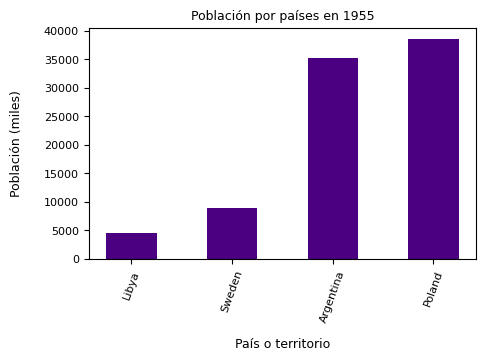

In [26]:
# Mediante la función plt.bar() de las librerías matplotlib
poblacion_1995 = df_countries.loc[['Argentina', 'Sweden', 'Poland', 'Libya'], '1995']
poblacion_1995_ordenada = poblacion_1995.sort_values()


# creamos el plot
plt.figure(figsize=(5, 3))
plt.bar(poblacion_1995_ordenada.index, poblacion_1995_ordenada.values, color='indigo', width=0.5)


# ajustamos las etiquetas y el titulo, junto al tamaño de la fuente y la separación de los ejes
plt.xlabel('País o territorio', fontsize=9, labelpad=10)
plt.ylabel('Población (miles)', fontsize=9, labelpad=15)
plt.title('Población por países en 1955', fontsize=9)
plt.xticks(rotation=70, fontsize=8) # rotamos las etiquetas del eje x 

# ajustamos el eje y para que vaya de 5000 en 5000
max_y = poblacion_1995_ordenada.max() + 5000
plt.yticks(range(0, max_y, 5000), fontsize=8) # fijamos el rango de valores del eje y


plt.show()

Seguiremos ahora un proceso análogo, pero usaremos otra función para hacer el plot. 

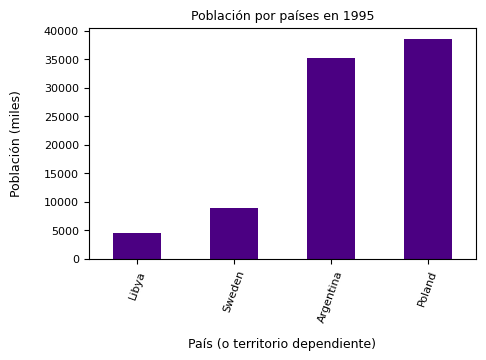

In [27]:
# Generamos una lista con los nombres de los países del enunciado
paises = ['Argentina', 'Sweden', 'Poland', 'Libya']


# Utilizamos la opción .loc para seleccionar la subtabla que dibujaremos
poblacion_1995 = df_countries.loc[paises, '1995']


# Utilizamos la función .sort_values() para ordenar la subtabla y .plot(kind='bar') para dibujar    
poblacion_1995_ordenada = poblacion_1995.sort_values()
ax = poblacion_1995_ordenada.plot(kind='bar', color='indigo', figsize=(5, 3), width=0.5)


# Podemos utilizar plt.ylabel() para especificar 'población (miles)'
ax.set_ylabel('Población (miles)', fontsize=9, labelpad=15)


# Podemos utilizar plt.xlabel() para especificar 'País (o territorio dependiente)'
ax.set_xlabel('País (o territorio dependiente)', fontsize=9, labelpad=10)


# con las 5 lineas siguientes, le damos el mismo formato que al anterior gráfico
ax.set_title('Población por países en 1995', fontsize=9)
ax.tick_params(axis='x', rotation=70, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

max_y = poblacion_1995_ordenada.max() + 5000
ax.set_yticks(range(0, max_y, 5000))

plt.show()

## Dibujar la evolución de la población de 4 países
Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia. 

Una primera visualización de los datos dará idea de la separación entre valores adecuada para ambos ejes. En este caso, el eje de ordenadas se moverá de 50000 en 50000 (en miles), y el eje de abscisas se moverá de 20 en 20 años.

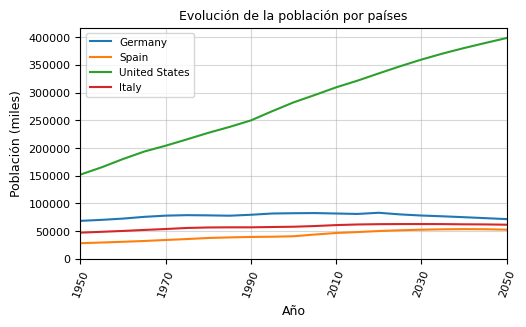

In [28]:
# Mediante la función plot de las librerías matplotlib 
paises = ['Germany', 'Spain', 'United States', 'Italy'] # lista de paises a representar
df_poblacion = df_countries.loc[paises] # seleccionamos las filas correspondientes a los paises usando .loc
df_poblacion = df_poblacion.T  # trasponemos para que los años sean los índices


# creamos el plot
plt.figure(figsize=(5.5, 3))
plt.plot(df_poblacion.index, df_poblacion.values)

# ajustamos las etiquetas y el titulo, así como el tamaño de la fuente
plt.xlabel('Año', fontsize=9)
plt.ylabel('Población (miles)', fontsize=9)
plt.title('Evolución de la población por países', fontsize=9)

# ajustamos el eje x para que vaya de 20 en 20 años y rotamos las etiquetas
plt.xticks(df_poblacion.index[::4], rotation=70, fontsize=8)

# ajustamos el eje y para que vaya de 50000 en 50000
max_y = df_poblacion.values.max() + 50000
plt.yticks(range(0, max_y, 50000), fontsize=8)

plt.margins(x=0)  # eliminamos el margen entre los limites del eje x y los datos

plt.grid(True, alpha=0.5)  # añadimos una cuadrícula con transparencia
plt.legend(labels=paises, fontsize=7.5)  # leyenda

plt.show()

Mismo plot pero con la función `plot(kind='line')`

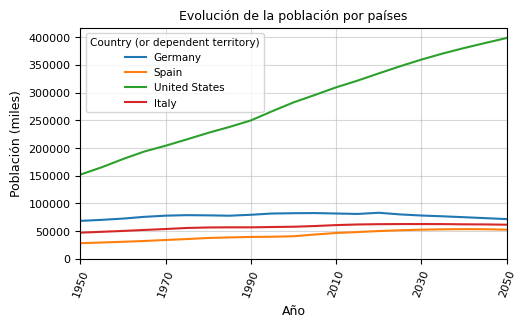

In [29]:
# Generamos una lista con los nombres de los países del enunciado
paises = ['Germany', 'Spain', 'United States', 'Italy']


# Generamos la subtabla correspondiente con la opción .loc
df_poblacion = df_countries.loc[paises]
df_poblacion = df_poblacion.T  #trasponemos para que los años sean los índices

    
# Utilizamos la función plot(kind='line') para dibujar
ax = df_poblacion.plot(kind='line', figsize=(5.5, 3))


# Añadir las fechas a la figura
ax.tick_params(axis='x', rotation=70, labelsize=8)
ax.margins(x=0) # eliminamos el margen entre los limites del eje x y los datos


# Etiquetar los ejes
ax.set_xlabel('Año', fontsize=9)
ax.set_ylabel('Población (miles)', fontsize=9)


# con las 9 lineas siguientes, le damos el mismo formato que a la figura anterior
ax.set_title('Evolución de la población por países', fontsize=9)

# ajustamos el eje x para que vaya de 20 en 20 años (uno de cada 4 valores) y rotamos las etiquetas
ax.tick_params(axis='x', rotation=70, labelsize=8)
ax.set_xticks(range(0, len(df_poblacion.index), 4))
ax.set_xticklabels(df_poblacion.index[::4])

ax.tick_params(axis='y', labelsize=8)
max_y = df_poblacion.values.max() + 50000 # ajustamos el eje y para que vaya de 50000 en 50000
ax.set_yticks(range(0, max_y, 50000))

ax.grid(True, alpha=0.5) # cuadricula 

# esta vez, la leyenda tiene titulo (siguiendo el grafico puesto de ejemplo)
ax.legend(title='Country (or dependent territory)', fontsize=7.5, title_fontsize=7.5, loc='upper left')

plt.show()

## Dibujar la evolución de los 5 países más populosos hasta 2010 y 2050  
Dibujar dos gráficas: una con la evolución para todo el período de los países más populosos en 2010, y otra con los países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

Una primera visualización de los datos dará idea de la separación entre valores adecuada para ambos ejes. En este caso, el eje de ordenadas se moverá de 200000 en 200000 (en miles), y el eje de abscisas se moverá de 20 en 20 años.

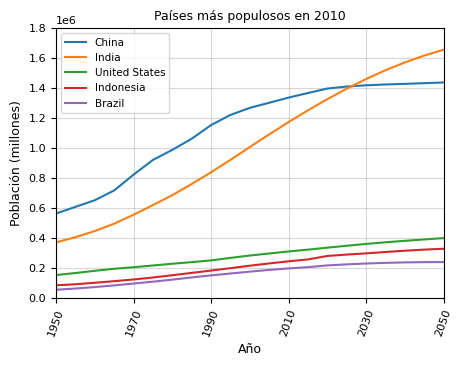

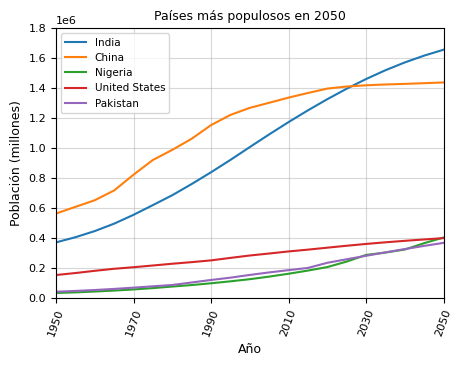

In [32]:
# Mediante la función plot de las librerías matplotlib
def plot_populosos(tabla, ano):
    # Ordenamos la tabla según el año y nos quedamos con los 5 primeros paises
    df_ordenada = tabla.sort_values(by=ano, ascending=False).head(5)
    df_ordenada = df_ordenada.T
    
    # dibujamos la evolución de la población utilizando plt.plot
    plt.figure(figsize=(5, 3.5))
    plt.plot(df_ordenada.index, df_ordenada.values)
    
    # ajustamos las etiquetas y el titulo
    plt.xlabel('Año', fontsize=9)
    plt.ylabel('Población (millones)', fontsize=9)
    plt.title(f'Países más populosos en {ano}', fontsize=9)


    # ajustamos el eje x para que vaya de 20 en 20 años
    plt.xticks(df_ordenada.index[::4], rotation=70, fontsize=8)
    plt.margins(x=0, y=0) # eliminamos el margen entre los limites del eje x e y y los datos

    # el eje y para que vaya de 200000 en 200000
    max_y = df_ordenada.values.max() + 200000
    plt.yticks(range(0, max_y, 200000), fontsize=8)
    plt.gca().yaxis.get_offset_text().set_fontsize(8)  # reducimos el tamaño del texto de escalado del eje y (1e6)
    
    plt.grid(True, alpha=0.5) # cuadricula 
    plt.legend(labels=df_ordenada.columns, fontsize=7.5) # leyenda
    
    plt.show()


# usamos la tabla df_countries, que resultó de eliminar los datos de la poblacion mundial en le ejercicio 6
plot_populosos(df_countries, '2010')
plot_populosos(df_countries, '2050')

En el plot de ejemplo, Indonesia ocupaba el quinto lugar. Sin embargo, con los datos actuales de esta página de Wikipedia, Pakistán ocupa este lugar. Mismo plot pero con la función `plot(kind='line')`

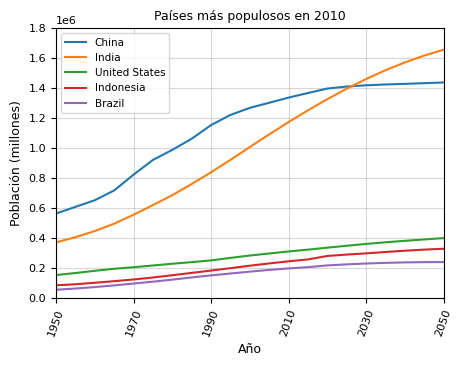

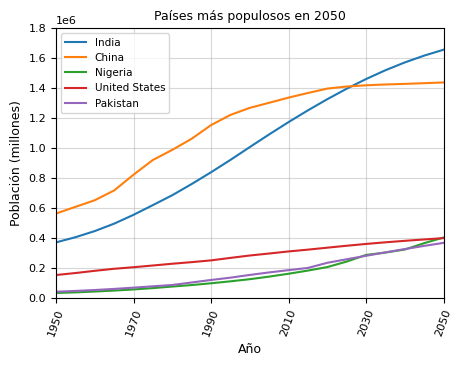

In [33]:
# Definimos la función plot_populosos()
def plot_populosos(tabla, ano):
    
    # Ordenamos la tabla según el año
    df_ordenada = tabla.sort_values(by=ano, ascending=False)

    
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    df_ordenada = df_ordenada.iloc[:5]
    paises = df_ordenada.index.tolist()


    # Utilizamos los nombres para invocar la subtabla mediante .loc y dibujamos mediante plot(kind='line')
    df_poblacion = tabla.loc[paises]
    df_poblacion = df_poblacion.T  # transponer el DataFrame para que los años sean el índice
    ax = df_poblacion.plot(kind='line', figsize=(5, 3.5))


    # ajustamos el resto del plot para obtener un formato análogo al anterior
    ax.set_xlabel('Año', fontsize=9)
    ax.set_ylabel('Población (millones)', fontsize=9)
    ax.set_title(f'Países más populosos en {ano}', fontsize=9)

    # ajustamos el eje x para que vaya de 20 en 20 años
    ax.set_xticks(range(0, len(df_poblacion.index), 4))
    ax.set_xticklabels(df_poblacion.index[::4], rotation=70, fontsize=8)
    ax.margins(x=0, y=0) # eliminamos el margen entre los límites del eje x e y y los datos
    
    # ajustamos el eje y para que vaya de 200000 en 200000
    max_y = df_poblacion.values.max() + 200000
    ax.set_yticks(range(0, max_y, 200000))
    ax.tick_params(axis='y', labelsize=8)

    ax.yaxis.get_offset_text().set_fontsize(8)  # reducir el tamaño del texto de escalado del eje y (1e6)

    ax.grid(True, alpha=0.5)
    ax.legend(fontsize=7.5, loc='upper left')
    
    plt.show()

# Aquí invocamos la función plot_populosos()
# Para ello, debemos eliminar en primer lugar los valores mundiales
# usamos la tabla df_countries, que resultó de eliminar los datos de la poblacion mundial en le ejercicio 6
plot_populosos(df_countries, '2010')
plot_populosos(df_countries, '2050')